## Index
<a href="#scrollTo=Popularity_Analysis">Popularity Analysis</a>
- <a href="">TS Popularity Overall</a>
- <a href="#scrollTo=hfO_TBrFWADb&line=6&uniqifier=1">Popularity of Albums</a>
- <a href="#scrollTo=hCCCLCP02oVG&line=1&uniqifier=1">Popularity Vs Song features</a>
- <a href="#scrollTo=hCCCLCP02oVG&line=1&uniqifier=1">Type Vs Popularity</a>

<a href="#scrollTo=JM-K5usr33tE&line=1&uniqifier=1">Music Feature Analysis</a>
- <a href="#scrollTo=Music_Features">Music Features</a>
- <a href="#scrollTo=SongType">Song Types</a>
- <a href="#scrollTo=Feature_Analysis">Feature Analysis</a>
- <a href="#scrollTo=HeatMap">HeatMap</a>

<a href="#scrollTo=Sentiment_Analysis">Sentiment Analysis</a>
- <a href="#scrollTo=Top_5_Positive_Songs">Top 5 Positive Songs</a>
- <a href="#scrollTo=Top_5_Negative_Songs">Top 5 Negative Songs</a>
- <a href="#scrollTo=Sentiment_of_Albums">Sentiment of Albums</a>
- <a href="#scrollTo=Sentiment_and_Song_Features">Sentiment of Songs and features</a>

<a href="#scrollTo=Lyrics_And_Rhymes_Analysis">Lyrics and Rhymes Analysis</a>
- <a href="#scrollTo=List_of_Repeated_Rhymes">List of Repeated Rhymes</a>
- <a href="#scrollTo=Bar_and_Car_Rhymes">bar & Car Rhymes</a>
- <a href="#scrollTo=Never_and_Ever_Rhymes">Never & Ever Rhymes</a>


In [ ]:
#@title AllImports
import pandas as pd
import string
pd.set_option("display.max_columns", None)
import re
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download("stopwords")
nltk.download("wordnet")
from wordcloud import WordCloud
import ast

import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [ ]:
#@title AllFiles

import os
# Get the current working directory
current_directory = "/content/drive/MyDrive/Colab Notebooks/TS Rant"

# List all files in the current directory
file_paths = [os.path.join(current_directory+"/archive", f) for f in os.listdir(current_directory+"/archive") if os.path.isfile(os.path.join(current_directory+"/archive", f))]

#@title Create DataFrame

## Read all data using filepaths and concatenate all data
maindf=pd.DataFrame()
for file_path in file_paths:
  df=pd.read_csv(file_path)
  df["File"]=file_path.split("/")[2].split("-")[0]
  maindf = pd.concat([maindf,df])
  #scan_data(df)
#scan_data(maindf)

#@title Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

#@title Get Lyrics DataFrame
justlyric = maindf.groupby("track_title").agg({"lyric":'sum'})
justlyric["preprocesslyric"] = justlyric["lyric"].apply(lambda x:preprocess_text(x))
justlyric.reset_index(inplace=True)

In [ ]:
#@title Flashcard Visual
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def flashcard_visual(text, title, word1, word2):
  text = text.replace(word1, f"{word1.upper()}")
  text = text.replace(word2, f"{word2.upper()}")
  fig, ax = plt.subplots(figsize=(1, 1))
  ax.axis('off')

  # Font size and style for the text and title
  font_size = 18
  font_style = 'normal'

  # Text baseline for annotation positioning (adjusted slightly)
  text_baseline = 0.5

  # Track current x-position for annotation placement
  current_x = 0.5
  ax.text(0.5,0.5, text, ha='center', va='center', fontsize=font_size, fontstyle=font_style)
  ax.text(0.5, 0.9, title, ha='center', va='top', fontsize=font_size - 2, fontstyle=font_style)

  plt.tight_layout()
  plt.show()



In [ ]:
#@title Import transformed Data
lyrics_feature = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/TS Rant/LyricsFeatures.xlsx")
song_feature = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/TS Rant/SongFeatures.xlsx")
word_count = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/TS Rant/WordCounts.xlsx")
fulldf = lyrics_feature.merge(song_feature, how="inner", on = "track_title")
album_lookup = maindf[["album_name", "track_title"]].drop_duplicates().set_index("track_title")["album_name"].to_dict()
fulldf["album_name"]=fulldf["track_title"].map(album_lookup)

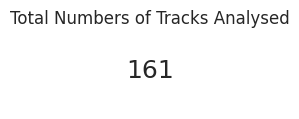

In [ ]:
#@title Total Number of Tracks Analysed
flashcard_visual(fulldf.track_title.nunique(), "Total Numbers of Tracks Analysed")

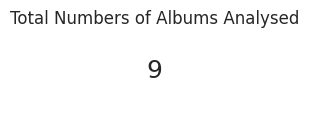

In [ ]:
#@title Tota Albums Analysed
flashcard_visual(fulldf.album_name.nunique(), "Total Numbers of Albums Analysed")

## Popularity Analysis

<Axes: ylabel='popularity'>

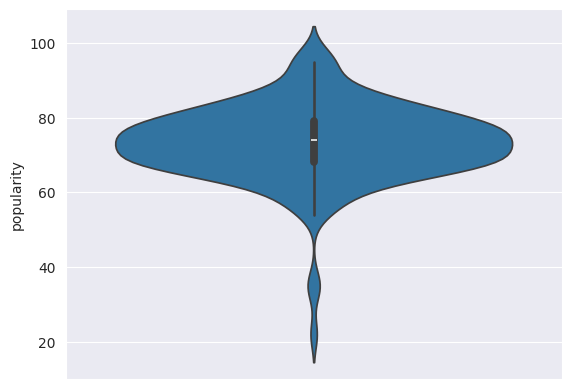

In [ ]:
#@title Popularity Of Taylor Swift
sns.violinplot(fulldf["popularity"])

<ipython-input-9-ebc6834f1816>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


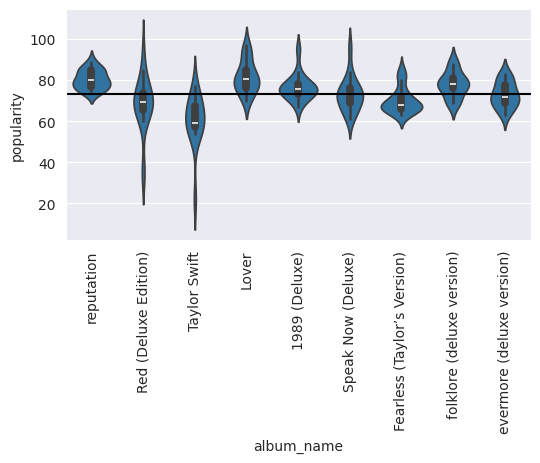

In [ ]:
#@title Popularity of Albums
plt.figure(figsize=(6,3))
ax = sns.violinplot(x=fulldf["album_name"],y=fulldf["popularity"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.axhline(y=fulldf["popularity"].mean(), color='black', linestyle='-', label='Average Score')
plt.show()

<Axes: >

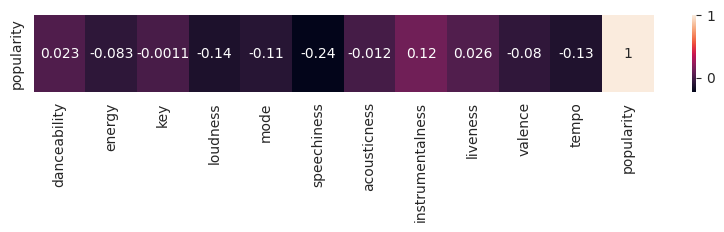

In [ ]:
#@title Popularity & Song Features
temp = fulldf[['danceability','energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo','popularity']].corr()["popularity"]
plt.figure(figsize=(10,1))
sns.heatmap(pd.DataFrame(temp).T, annot=True)

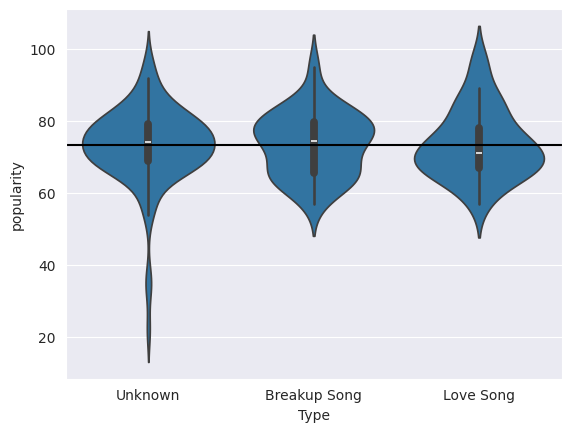

In [ ]:
#@title Popularity Vs Type
sns.violinplot(data=fulldf, x="Type", y="popularity")
plt.axhline(y=fulldf["popularity"].mean(), color='black', linestyle='-', label='Average Score')

## Music Features Analysis

- `Danceability:` Suitability of a track for dancing based on musical elements.
- `Energy:` Intensity and activity level of a track, often associated with loudness and tempo.
- `Key:` Tonal center or pitch around which melody and harmonies revolve, influencing mood.
- `Loudness:` Volume or amplitude of a track, indicating perceived loudness.
- `Mode:` Tonal quality or mood of a track, major keys sound more positive, minor keys darker.
- `Speechiness:` Presence of spoken words in a track, indicating vocal content.
- `Acousticness:` Extent to which a track is acoustic or electronic in nature.
- `Instrumentalness:` Absence of vocals in a track, indicating instrumental nature.
- `Liveness:` Presence of live performance elements in a track.
- `Valence:` Overall mood or emotional positivity of a track.
- `Tempo:` Speed or pace of a track measured in beats per minute (BPM), influencing energy level.


In [ ]:
#@title Music Features
music_features = {
    'danceability': 'Danceability describes how suitable a track is for dancing based on a combination of musical elements such as tempo, rhythm stability, beat strength, and overall regularity. Tracks with higher danceability are typically easier to dance to, with a steady beat and rhythm.',
    'energy': 'Energy refers to the intensity and activity level of a track. It\'s often associated with the perceived intensity and power of the sound, including factors like loudness, dynamic range, and the overall feeling of the music. High-energy tracks may be louder, faster, and more intense, while low-energy tracks may be quieter, slower, and more subdued.',
    'key': 'The key of a song refers to the tonal center or the pitch around which the melody and harmonies revolve. It is usually represented by a letter (e.g., C, D, G) and can be major or minor. The key can influence the mood and emotional impact of a song.',
    'loudness': 'Loudness is a measure of the volume or amplitude of a track, typically measured in decibels (dB). It indicates how loud or quiet a song is perceived to be. Loudness can affect the overall impact and intensity of the music.',
    'mode': 'Mode refers to the tonal quality or mood of a track, whether it\'s major or minor. Major keys generally sound more positive, bright, or uplifting, while minor keys often sound darker, sadder, or more melancholic. The mode can greatly influence the emotional impact of a song.',
    'speechiness': 'Speechiness measures the presence of spoken words in a track, such as speech, rap, or spoken word segments. It can indicate the level of vocal content in a song compared to purely instrumental tracks.',
    'acousticness': 'Acousticness indicates the extent to which a track is acoustic or non-electronic. A high acousticness value suggests that a track is primarily made up of acoustic instruments or sounds, while a low value suggests that it contains more electronic or synthesized elements.',
    'instrumentalness': 'Instrumentalness measures the absence of vocals in a track. A high instrumentalness value indicates that a track is likely instrumental, meaning it contains little to no vocal content, while a low value suggests the presence of vocals.',
    'liveness': 'Liveness measures the presence of an audience or live performance elements in a track. A high liveness value suggests that the track was recorded live or contains live audience reactions, while a low value indicates that it was likely recorded in a studio setting.',
    'valence': 'Valence describes the overall mood or emotional positivity of a track. It is typically represented on a scale from negative to positive, with higher values indicating a more positive or upbeat mood and lower values indicating a more negative or sad mood.',
    'tempo': 'Tempo refers to the speed or pace of a track, measured in beats per minute (BPM). It indicates how fast or slow the music feels and can influence the energy level and danceability of a song. Higher tempo values generally correspond to faster-paced music, while lower values indicate slower-paced music.'
}


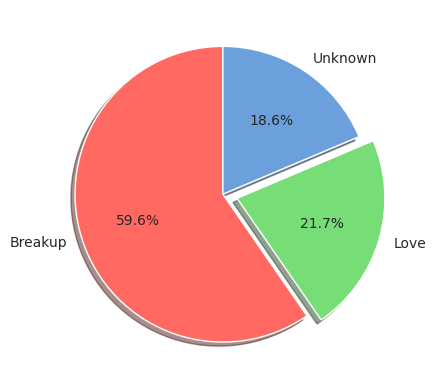

In [ ]:
#@title SongType
sns.set_style("dark")
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0)
#add colors
colors = ['#FF6961','#77DD77','#6CA0DC','#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(fulldf["Type"].value_counts(),labels=["Breakup", "Love", "Unknown"], explode=explode, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

The key of a song refers to the tonal center or the pitch around which the melody and harmonies revolve
 It is usually represented by a letter (e
g
, C, D, G) and can be major or minor
 The key can influence the mood and emotional impact of a song



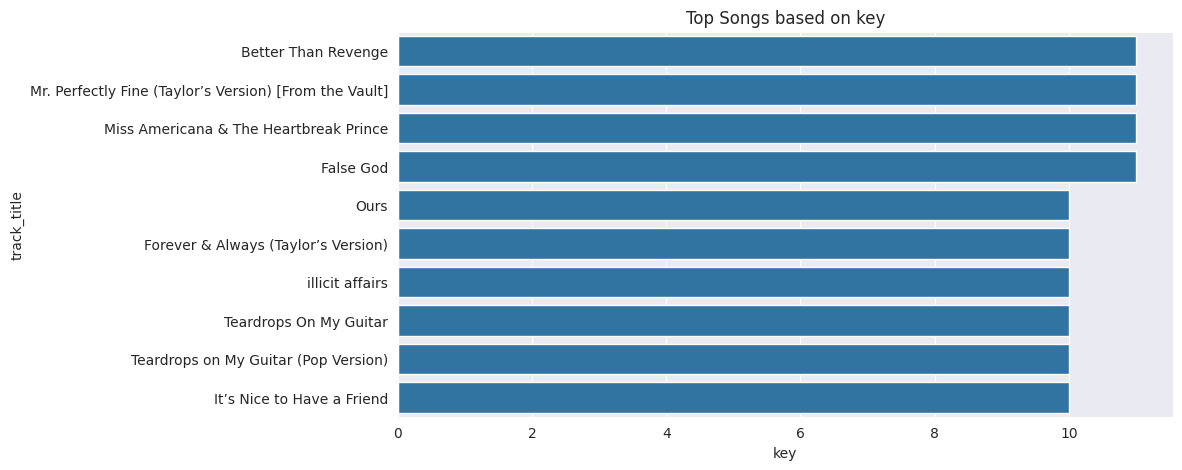

<Axes: xlabel='Type', ylabel='key'>

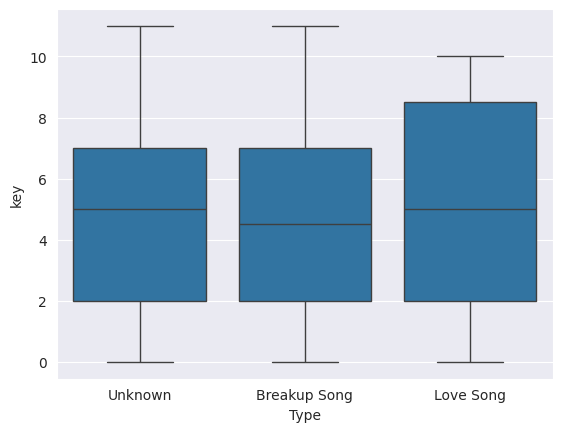

In [ ]:
#@title Feature Analysis
sns.set_style('darkgrid')  # Example: Set darkgrid theme

column= "key" # @param ['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo'] {allow-input: true}
index="track_title" #@param ["track_title", "album_name"]
print(music_features[column].replace(".","\n"))
plt.figure(figsize=(10,5))
sns.barplot(data=fulldf.groupby(index, as_index=False).agg({column:'mean'}).sort_values(by=column, ascending=False).head(10),
              y=index, x=column)
plt.title(f"Top Songs based on {column}")

plt.show()

sns.boxplot(x=fulldf["Type"], y=fulldf[column])

<Axes: xlabel='Type', ylabel='album_name'>

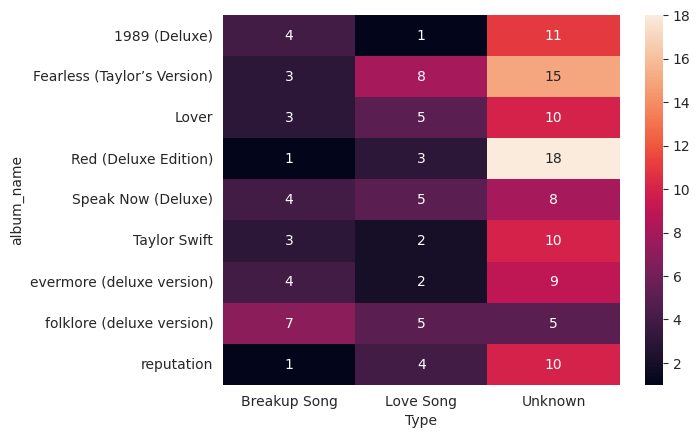

In [ ]:
#@title HeatMap
sns.heatmap(data=pd.pivot_table(data=fulldf, index="album_name", columns="Type", values="key", aggfunc="count"),annot=True)

## Sentiment Analysis

In [ ]:
#@title Get Sentiments
import pandas as pd
from textblob import TextBlob

def get_sentiment(text):
  blob = TextBlob(text)
  return blob.sentiment.polarity
fulldf["sentiment"] = fulldf["lyric"].apply(lambda x: get_sentiment(x))

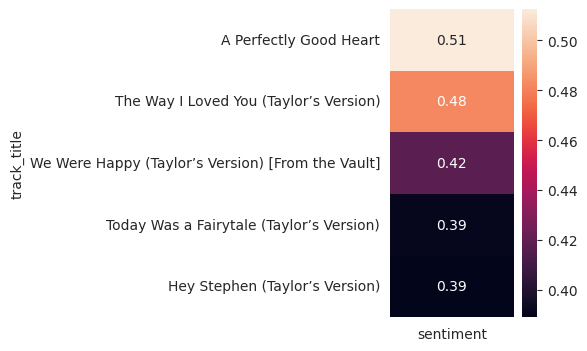

In [ ]:
#@title Top 5 Positive Songs
temp = fulldf.groupby("track_title")["sentiment"].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(2,4))
sns.heatmap(pd.DataFrame(temp), annot=True)
plt.show()

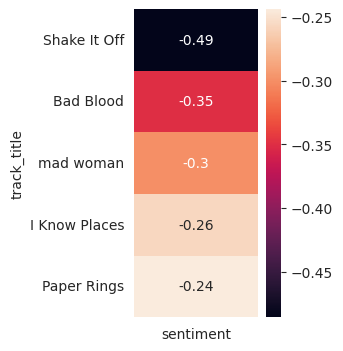

In [ ]:
#@title Top 5 Negative Songs
temp = fulldf.groupby("track_title")["sentiment"].mean().sort_values(ascending=True).head(5)
plt.figure(figsize=(2,4))
sns.heatmap(pd.DataFrame(temp), annot=True)
plt.show()

<Axes: ylabel='album_name'>

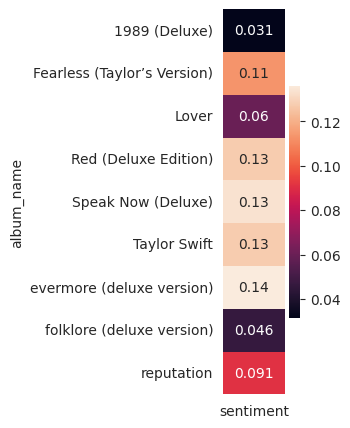

In [ ]:
#@title Sentiment of Albums
plt.figure(figsize=(1,5))
sns.heatmap(data=pd.pivot_table(data=fulldf, index="album_name", values="sentiment", aggfunc="mean"),annot=True)

<ipython-input-20-1250350d1e7b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pd.DataFrame(fulldf.corr()["sentiment"].sort_values()).T, annot=True)


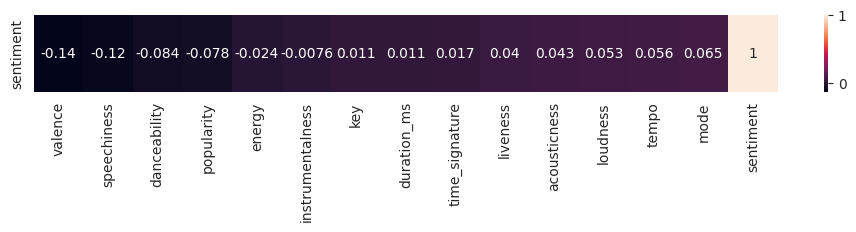

In [ ]:
#@title Sentiment and Song Features
plt.figure(figsize=(12,1))
sns.heatmap(pd.DataFrame(fulldf.corr()["sentiment"].sort_values()).T, annot=True)
plt.show()

## Lyrics And Rhymes Analysis


In [ ]:
#@title More preprocessing
fulldf["preprocesslyric"] = fulldf["preprocesslyric"].str.replace("[","").replace("]","")
word_count["RhymeScore2"] = word_count.apply(lambda x: x['RhymeScore']/min(len(x["Word1"]),len(x["Word2"])), axis=1)

# Deleting Duplicates
# Word 1 = bar and Word 2 = car is same as word1 = car and word 2 = bar
def char_count_dict(text):
  char_counts = {}
  for char in text:
    if char.isalpha():  # Consider only alphabetic characters
      char_counts[char.lower()] = char_counts.get(char.lower(), 0) + 1
  return char_counts

def convert_to_list(x):
  try:
    return ast.literal_eval(x)
  except:
    return x


word_count["dict_"]=word_count.apply(lambda x: char_count_dict(x["Word1"]+x["Word2"]), axis=1)
word_count = word_count.drop_duplicates(subset=["dict_"])
word_count["List Of Songs"] = word_count["List Of Songs"].apply(lambda x:convert_to_list(x))

def handle_joint_words(text):
  for letter in string.ascii_uppercase:
    text = text.replace(letter, f"\n {letter.lower()}")
  return text

justlyric["lyric"] = justlyric["lyric"].apply(handle_joint_words)

In [ ]:
#@title Lyrics Visualizer Function
def print_lyrics(list_of_tracks, word1, word2):
  if len(word2)>len(word1):
    temp = word1
    word1 = word2
    word2 = temp
  class colors:
    RED = '\033[91m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    END = '\033[0m'
  for track in list_of_tracks:
    print(f"In Song {track} \n")
    para = (justlyric[justlyric["track_title"]==track]["lyric"].values[0]).replace(",","\n")
    #para = para.replace(word1, "${YELLOW}%s${END}"%word1)
    #para = para.replace(word2, "${RED}%s${END}"%word2)
    #para = para.replace("${YELLOW}", colors.YELLOW).replace("${END}", colors.END)
    #para = para.replace("${RED}", colors.RED).replace("${END}", colors.END)
    final_list=[]
    for line in para.split("\n"):
      if (word1 in line)|(word2 in line):
        final_list.append(line)
      else:
        pass
    new_para = "\n".join(final_list)
    #print(new_para)
    flashcard_visual(new_para,"", word1, word2)
    print("------------------------------------------------------------------------------------")

def rhymes_printout(word1, word2):
  global word_count
  row = word_count[((word_count["Word1"]==word1)|(word_count["Word2"]==word1))&((word_count["Word1"]==word2)|(word_count["Word2"]==word2))]
  word1 = row["Word1"].values[0]
  word2 = row["Word2"].values[0]
  print(f"Times {word1} and {word2} are rhymes \n")
  print_lyrics(row["List Of Songs"].values[0],word1,word2)

In [ ]:
#@title List of Repeated Rhymes
rhymne_score_filter = 0.8
songs_filter = 4
temp = word_count[(word_count["RhymeScore2"]>rhymne_score_filter)&((word_count["total songs"]>songs_filter))]
temp[["Word1", "Word2", "Count", "total songs"]].T

,10,36,40,46,49,58,68,94,106,136,182,194,199,204,260,306,310,311,334,363,410,412,416,438,457,460,533
Word1,ever,nothing,oh,alone,oh,way,thing,something,gone,phone,said,tonight,end,still,someone,around,back,ever,knew,oh,anything,right,mistake,day,cold,day,ah
Word2,never,thing,ohoh,one,ooh,away,everything,thing,one,one,id,night,friend,ill,one,ground,flashback,forever,new,ohohoh,thing,alright,take,someday,old,today,yeah
Count,634,34,1111,39,213,29,32,30,15,19,26,37,10,42,14,28,21,158,22,75,4,8,6,17,11,27,60
total songs,30,17,17,16,16,15,14,12,11,10,9,8,8,8,7,6,6,6,6,6,5,5,5,5,5,5,5


Times bar and car are rhymes 

In Song Cornelia Street 



<ipython-input-63-6b9f1faa950d>:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


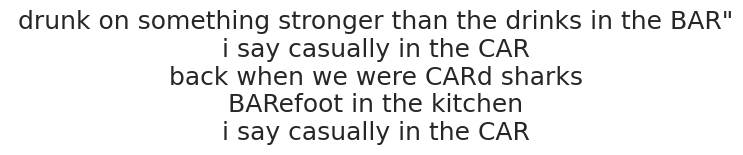

------------------------------------------------------------------------------------
In Song Cruel Summer 



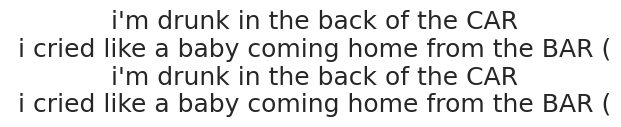

------------------------------------------------------------------------------------
In Song Getaway Car 



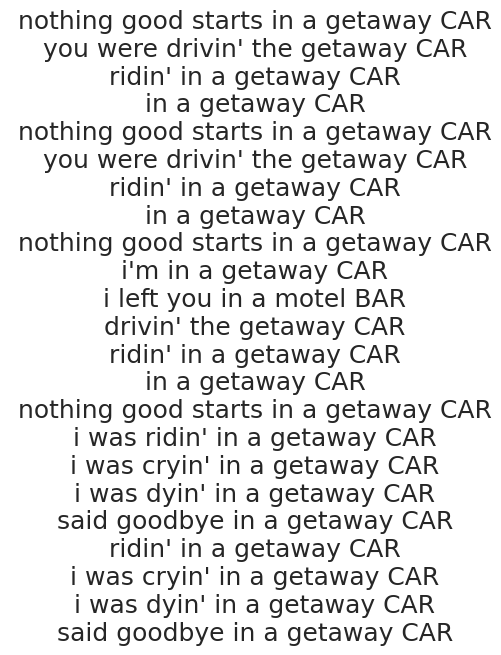

------------------------------------------------------------------------------------
In Song cardigan 



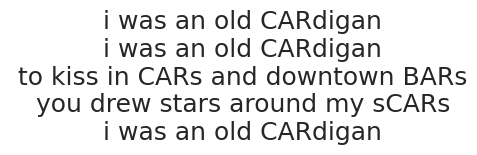

------------------------------------------------------------------------------------
In Song cowboy like me 



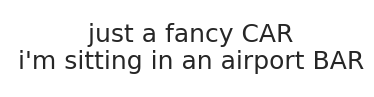

------------------------------------------------------------------------------------


In [ ]:
#@title Bar and Car Rhymes
rhymes_printout("bar", "car")

In [ ]:
#@title Never and Ever Rhymes
rhymes_printout("never", "ever")

Output hidden; open in https://colab.research.google.com to view.